In [1]:
import pandas as pd, matplotlib.pyplot as plt
import cape_expected_returns as cape_er
%matplotlib inline

# Number of Years Needed to Retire

<AxesSubplot:xlabel='Start'>

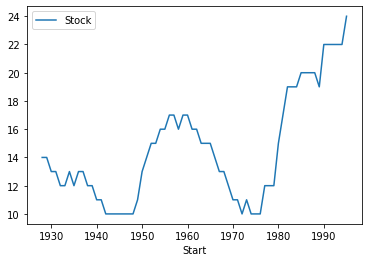

In [2]:
def getYears(allocation, i, verbose = False):
    mix = pd.DataFrame({
        'Return': allocation * cape_er.stock.Return + (1-allocation) * cape_er.bond.Return, 
        'percentage': allocation * cape_er.stock.percentage + (1-allocation) * cape_er.bond.percentage
    })
    mix.index = cape_er.stock.Start
    total = 0
    # Get Dollar Cost Average Return for gap years
    for j, r in enumerate(mix.loc[i:i+gap].itertuples()):
        total = (total + 1) * r.Return
        if verbose:
            print(r[0], total, r.Return, r.percentage, total * r.percentage)
        if total * r.percentage > 1:
            break
    return j+1

def getYearsHelper(allocation):
    output = []
    # Mix Stocks and Bonds According to Allocation
    for i in cape_er.stock.Start[:len(cape_er.stock)-gap]:
        output.append(getYears(allocation, i))
    return output
gap = 24
save = pd.DataFrame({
    'Stock': getYearsHelper(1), 
#     'Mixed': getYearsHelper(0.5), 
#     'Bond': getSave(0)
}, index = cape_er.stock[:-gap].Start)
save.plot()

# Amount of Savings Over Time

<AxesSubplot:xlabel='Start'>

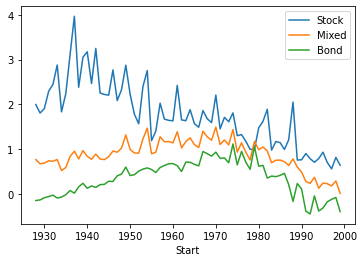

In [3]:
def getSave(allocation):
    output = []
    # Mix Stocks and Bonds According to Allocation
    mix = pd.DataFrame({
        'Return': allocation * cape_er.stock.Return + (1-allocation) * cape_er.bond.Return, 
        'percentage': allocation * cape_er.stock.percentage + (1-allocation) * cape_er.bond.percentage
    })
    for i in range(len(mix)-gap):
        total = 0
        # Get Dollar Cost Average Return for gap years
        for r in mix[i:i+gap].itertuples():
            total = (total + 1) * r.Return
        # Get Final Spending Amount
        output.append(total * mix.percentage[i+gap])
    return output
gap = 20
save = pd.DataFrame({
    'Stock': getSave(1), 
    'Mixed': getSave(0.5), 
    'Bond': getSave(0)
}, index = cape_er.stock[:-gap].Start)
save.plot()